In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

Sammy Suliman, last modified 10/20/2022 $\newline$
The purpose of this code is to execute the Barycentric Formula for the interpolating polynomial at the given function values (x_0, f(x_0)) ... (x_n, f(x_n)). First I composed a function to find the barycentric weights $\lambda_j$, where $\lambda_j$ is equal to $\frac{1}{(x_j - x_k)}$ for the selected x-values of our function. The function has one parameter, the list of selected x-values. Then I used this function as a helper function in my function to compute the barycentric formula, with parameters x (for the value I am evaluating my interpolating polynomial at), the list of selected x-values of the function, and the list of selected function values.

In [9]:
def lambdaj(x_list):
    lambda_j = []
    for j in range(0, len(x_list)):
        w_prime = 1
        for k in range(0, len(x_list)):
            if k == j:
                w_prime = w_prime
            else:
                x_j = x_list[j]
                x_k = x_list[k]
                w_prime = w_prime * (x_j - x_k)
        lambda_j.append((1 / w_prime))
    return lambda_j

In [24]:
def barycentric_interpolation(x, x_list, f_list):
    p1 = []
    p2 = []
    for j in range(0, len(lambdaj(x_list))):
        x_j = x_list[j]
        f_j = f_list[j]
        lambda_j = lambdaj(x_list)[j]
        p1.append(f_j * (lambda_j / (x - x_j)))
        p2.append(lambda_j / (x - x_j))
    return (sum(p1) / sum(p2))

In [25]:
x_list = [0, 0.25, 0.5, 0.75, 1.25, 1.5]
f_list = [0, 0.7071, 1, 0.7071, -0.7071, -1]

In [26]:
barycentric_interpolation(2, x_list, f_list)

0.8519999999999989

Sammy Suliman, last modified 10/21/2022 $\newline$
The purpose of the below code is to compute the barycentric weights when the nodes $x_j$ are equidistant, using the
formula provided in the problem. We will then use our code for the barycentric interpolation above with the new formula
for $\lambda_j$.

In [98]:
def lambdaj2(x_list):
    lambda_j = []
    for j in range(len(x_list)):
        lambda_j.append(((-1)**j)*math.comb(len(x_list) - 1, j))
    return lambda_j

In [99]:
def barycentric_interpolation2(x, x_list, f_list):
    p1 = []
    p2 = []
    for j in range(0, len(lambdaj2(x_list))):
        x_j = x_list[j]
        f_j = f_list[j]
        lambda_j = lambdaj2(x_list)[j]
        p1.append(f_j * (lambda_j / (x - x_j)))
        p2.append(lambda_j / (x - x_j))
    return (sum(p1) / sum(p2))

Sammy Suliman, last modified 10/21/2022 $\newline$
We now code the selected function, and evaluate the equidistant nodes by the formula given in the assignment when n = 4,
and compute the actual values of the function at those points.

In [100]:
def f(x_list):
    f_list = []
    for x in x_list:
        f_list.append(1 / (1 + x**2))
    return f_list

In [101]:
def x_creator(n):
    x_j = []
    for j in range(n+1):
        x_j.append(-5+j*(10/n))
    return x_j

In [102]:
# n = 4
x_list = x_creator(4)
print(x_list)

[-5.0, -2.5, 0.0, 2.5, 5.0]


In [103]:
f_list = f(x_list)
print(f_list)

[0.038461538461538464, 0.13793103448275862, 1.0, 0.13793103448275862, 0.038461538461538464]


Sammy Suliman, last modified 10/21/2022
Next we will use our (modified) barycentric interpolation code to compute 5000 approximations for values of x not equal
to our nodes. Then we plot these values alongside the actual function graph.

In [104]:
bary_interp4 = []
for x in np.arange(-5, 5, 0.002):
    if math.isnan(barycentric_interpolation2(x, x_list, f_list)) == False:
        bary_interp4.append(barycentric_interpolation2(x, x_list, f_list))
    else:
        bary_interp4.append(0)

C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1499570813.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  p1.append(f_j * (lambda_j / (x - x_j)))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1499570813.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  p2.append(lambda_j / (x - x_j))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1499570813.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return (sum(p1) / sum(p2))


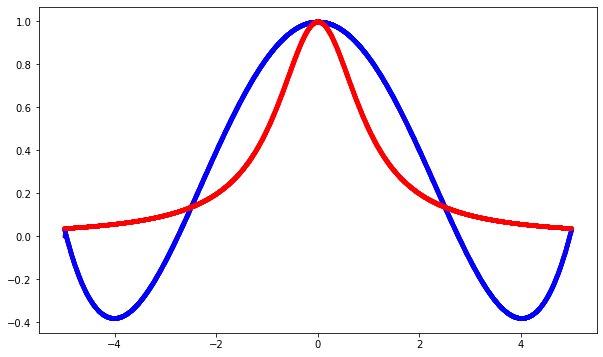

In [105]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(-5, 5, 0.002), bary_interp4, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)
plt.plot(np.arange(-5, 5, 0.002), f(list(np.arange(-5, 5, 0.002))), color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)

Sammy Suliman, last modified 10/21/2022 $\newline$
We now evaluate the equidistant nodes by the formula given in the assignment when n = 8, and compute the actual values of the function at those points.

In [106]:
# n = 8
x_list2 = x_creator(8)
print(x_list2)

[-5.0, -3.75, -2.5, -1.25, 0.0, 1.25, 2.5, 3.75, 5.0]


In [107]:
f_list2 = f(x_list2)
print(f_list2)

[0.038461538461538464, 0.06639004149377593, 0.13793103448275862, 0.3902439024390244, 1.0, 0.3902439024390244, 0.13793103448275862, 0.06639004149377593, 0.038461538461538464]


Sammy Suliman, last modified 10/21/2022 $\newline$
Next we will use our (modified) barycentric interpolation code to compute 5000 approximations for values of x not equal
to our nodes. Then we plot these values alongside the actual function graph.

In [108]:
bary_interp8 = []
for x in list(np.arange(-5, 5, 0.002)):
    if math.isnan(barycentric_interpolation(x, x_list2, f_list2)) == False:
        bary_interp8.append(barycentric_interpolation(x, x_list2, f_list2))
    else:
        bary_interp8.append(0)

C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1182279630.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  p1.append(f_j * (lambda_j / (x - x_j)))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1182279630.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  p2.append(lambda_j / (x - x_j))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1182279630.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return (sum(p1) / sum(p2))


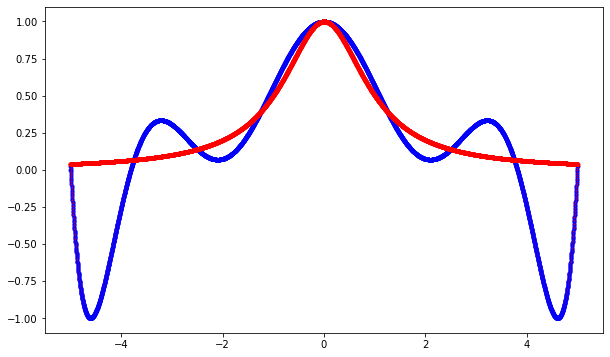

In [109]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(-5, 5, 0.002), bary_interp8, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)
plt.plot(np.arange(-5, 5, 0.002), f(list(np.arange(-5, 5, 0.002))), color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)

Sammy Suliman, last modified 10/21/2022 $\newline$
We now evaluate the equidistant nodes by the formula given in the assignment when n = 12, and compute the actual values of the function at those points.

In [110]:
x_list3 = x_creator(12)
print(x_list3)

[-5.0, -4.166666666666667, -3.333333333333333, -2.5, -1.6666666666666665, -0.833333333333333, 0.0, 0.8333333333333339, 1.666666666666667, 2.5, 3.333333333333334, 4.166666666666668, 5.0]


In [111]:
f_list3 = f(x_list3)
print(f_list3)

[0.038461538461538464, 0.054462934947049915, 0.08256880733944956, 0.13793103448275862, 0.26470588235294124, 0.5901639344262297, 1.0, 0.5901639344262292, 0.2647058823529411, 0.13793103448275862, 0.08256880733944952, 0.054462934947049894, 0.038461538461538464]


Sammy Suliman, last modified 10/21/2022
Next we will use our (modified) barycentric interpolation code to compute 5000 approximations for values of x not equal
to our nodes. Then we plot these values alongside the actual function graph.

In [112]:
bary_interp12 = []
for x in list(np.arange(-5, 5, 0.002)):
    if math.isnan(barycentric_interpolation(x, x_list3, f_list3)) == False:
        bary_interp12.append(barycentric_interpolation(x, x_list3, f_list3))
    else:
        bary_interp12.append(0)

C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1182279630.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  p1.append(f_j * (lambda_j / (x - x_j)))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1182279630.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  p2.append(lambda_j / (x - x_j))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1182279630.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return (sum(p1) / sum(p2))


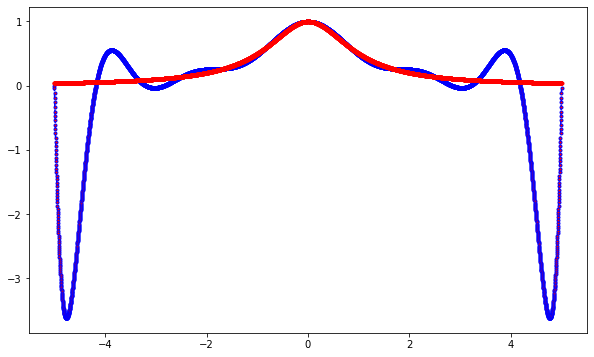

In [113]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(-5, 5, 0.002), bary_interp12, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)
plt.plot(np.arange(-5, 5, 0.002), f(list(np.arange(-5, 5, 0.002))), color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)

Sammy Suliman, last modified 10/21/2022 $\newline$
The purpose of the below code is to compute the barycentric weights when the nodes $x_j$ are in the form $x_j = \frac{a+b}{2} + \frac{b-a}{2}cos(\frac{j\pi}{n})$, where $[a, b]$ is the interval is defined over (here $[-5, 5]$) using the
formula provided in the problem. We will then use our code for the barycentric interpolation above with the new formula
for $\lambda_j$.

In [163]:
def lambdaj3(x_list):
    lambda_j = []
    for j in range(0, len(x_list)):
        if (j == 0) or (j == len(x_list)-1):
            lambda_j.append(0.5 * (-1)**j)
        else:
            lambda_j.append((-1)**j)
    return lambda_j

In [164]:
def barycentric_interpolation3(x, x_list, f_list):
    p1 = []
    p2 = []
    for j in range(0, len(lambdaj3(x_list))):
        x_j = x_list[j]
        f_j = f_list[j]
        lambda_j = lambdaj3(x_list)[j]
        p1.append(f_j * (lambda_j / (x - x_j)))
        p2.append(lambda_j / (x - x_j))
    return (sum(p1) / sum(p2))

Sammy Suliman, last modified 10/21/2022 $\newline$
We now evaluate the equidistant nodes by the formula given in the assignment when n = 4, and compute the actual values of the function at those points.

In [145]:
def x_creator2(n):
    x_j = []
    for j in range(n+1):
        x_j.append(5 * math.cos((j*math.pi)/n))
    return x_j

In [146]:
# n = 4
x_list = x_creator2(4)
print(x_list)

[5.0, 3.5355339059327378, 3.061616997868383e-16, -3.5355339059327373, -5.0]


In [147]:
f_list = f(x_list)
print(f_list)

[0.038461538461538464, 0.07407407407407407, 1.0, 0.07407407407407408, 0.038461538461538464]


Sammy Suliman, last modified 10/21/2022 $\newline$
Next we will use our (modified) barycentric interpolation code to compute 5000 approximations for values of x not equal
to our nodes. Then we plot these values alongside the actual function graph.

In [148]:
bary_interp4 = []
for x in np.arange(-5, 5, 0.002):
    if math.isnan(barycentric_interpolation(x, x_list, f_list)) == False:
        bary_interp4.append(barycentric_interpolation(x, x_list, f_list))
    else:
        bary_interp4.append(0)

C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1182279630.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  p1.append(f_j * (lambda_j / (x - x_j)))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1182279630.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  p2.append(lambda_j / (x - x_j))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1182279630.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return (sum(p1) / sum(p2))


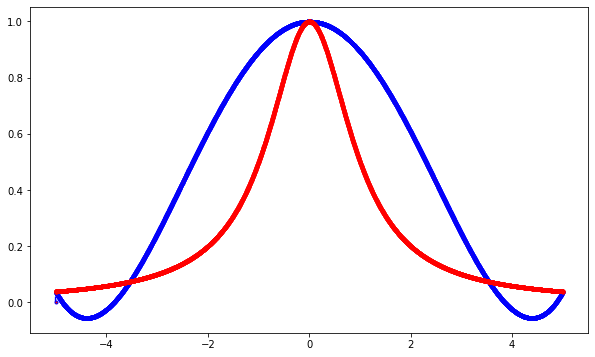

In [149]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(-5, 5, 0.002), bary_interp4, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)
plt.plot(np.arange(-5, 5, 0.002), f(list(np.arange(-5, 5, 0.002))), color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)

Sammy Suliman, last modified 10/21/2022 $\newline$
We now evaluate the equidistant nodes by the formula given in the assignment when n = 8, and compute the actual values of the function at those points.

In [150]:
# n = 8
x_list2 = x_creator2(8)
print(x_list2)

[5.0, 4.619397662556434, 3.5355339059327378, 1.9134171618254492, 3.061616997868383e-16, -1.9134171618254485, -3.5355339059327373, -4.619397662556434, -5.0]


In [151]:
f_list2 = f(x_list2)
print(f_list2)

[0.038461538461538464, 0.044765092294532106, 0.07407407407407407, 0.21453862919406327, 1.0, 0.21453862919406338, 0.07407407407407408, 0.044765092294532106, 0.038461538461538464]


Sammy Suliman, last modified 10/21/2022 $\newline$
Next we will use our (modified) barycentric interpolation code to compute 5000 approximations for values of x not equal
to our nodes. Then we plot these values alongside the actual function graph.

In [152]:
bary_interp8 = []
for x in np.arange(-5, 5, 0.002):
    if math.isnan(barycentric_interpolation3(x, x_list2, f_list2)) == False:
        bary_interp8.append(barycentric_interpolation3(x, x_list2, f_list2))
    else:
        bary_interp8.append(0)

C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1584870372.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  p1.append(f_j * (lambda_j / (x - x_j)))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1584870372.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  p2.append(lambda_j / (x - x_j))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1584870372.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return (sum(p1) / sum(p2))


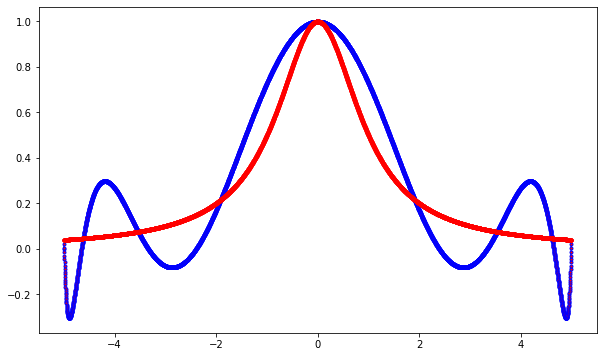

In [153]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(-5, 5, 0.002), bary_interp8, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)
plt.plot(np.arange(-5, 5, 0.002), f(list(np.arange(-5, 5, 0.002))), color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)

Sammy Suliman, last modified 10/21/2022 $\newline$
We now evaluate the equidistant nodes by the formula given in the assignment when n = 12, and compute the actual values of the function at those points.

In [154]:
# n = 12
x_list3 = x_creator2(12)
print(x_list3)

[5.0, 4.8296291314453415, 4.330127018922194, 3.5355339059327378, 2.5000000000000004, 1.2940952255126037, 3.061616997868383e-16, -1.2940952255126033, -2.499999999999999, -3.5355339059327373, -4.330127018922194, -4.829629131445341, -5.0]


In [155]:
f_list3 = f(x_list3)
print(f_list3)

[0.038461538461538464, 0.041109432510194305, 0.050632911392405056, 0.07407407407407407, 0.1379310344827586, 0.37387615826790377, 1.0, 0.3738761582679039, 0.1379310344827587, 0.07407407407407408, 0.050632911392405056, 0.04110943251019432, 0.038461538461538464]


Sammy Suliman, last modified 10/21/2022 $\newline$
Next we will use our (modified) barycentric interpolation code to compute 5000 approximations for values of x not equal
to our nodes. Then we plot these values alongside the actual function graph.

In [156]:
bary_interp12 = []
for x in np.arange(-5, 5, 0.002):
    if math.isnan(barycentric_interpolation3(x, x_list3, f_list3)) == False:
        bary_interp12.append(barycentric_interpolation3(x, x_list3, f_list3))
    else:
        bary_interp12.append(0)

C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1584870372.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  p1.append(f_j * (lambda_j / (x - x_j)))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1584870372.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  p2.append(lambda_j / (x - x_j))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1584870372.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return (sum(p1) / sum(p2))


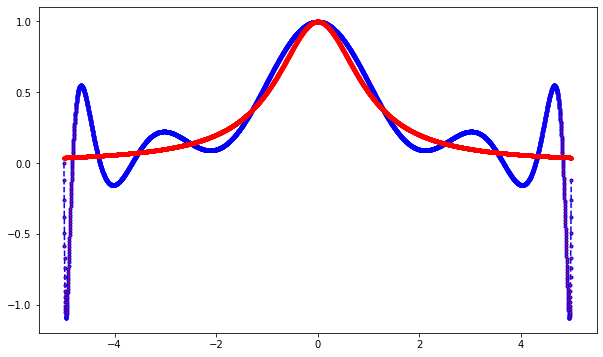

In [157]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(-5, 5, 0.002), bary_interp12, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)
plt.plot(np.arange(-5, 5, 0.002), f(list(np.arange(-5, 5, 0.002))), color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)

Sammy Suliman, last modified 10/21/2022 $\newline$
We now evaluate the equidistant nodes by the formula given in the assignment when n = 12, and compute the actual values of the function at those points.

In [158]:
x_list4 = x_creator2(100)
print(x_list4)

[5.0, 4.997532801828658, 4.990133642141358, 4.9778098230154, 4.9605735065723895, 4.938441702975689, 4.911436253643443, 4.879583809693737, 4.842915805643155, 4.801468428384715, 4.755282581475767, 4.704403844771127, 4.648882429441257, 4.588773128419906, 4.524135262330098, 4.455032620941839, 4.381533400219318, 4.303710135019719, 4.221639627510076, 4.1354028713728095, 4.045084971874737, 3.950775061878452, 3.852566213878946, 3.750555348152298, 3.644843137107058, 3.5355339059327378, 3.422735529643443, 3.3065593266182596, 3.1871199487434487, 3.0645352682648825, 2.9389262614623664, 2.8104168892606536, 2.6791339748949827, 2.545207078751856, 2.4087683705085756, 2.269952498697734, 2.1288964578253635, 1.9857394531739028, 1.8406227634233905, 1.6936896012264575, 1.5450849718747373, 1.3949555301961474, 1.2434494358242736, 1.0907162069827134, 0.9369065729286237, 0.7821723252011547, 0.6266661678215224, 0.4705415665925714, 0.31395259764656763, 0.157053795390642, 3.061616997868383e-16, -0.157053795390641

In [159]:
f_list4 = f(x_list4)
print(f_list4)

[0.038461538461538464, 0.03849806111998785, 0.038607901362434596, 0.038791880215393267, 0.039051380250497314, 0.039388367265096015, 0.03980542142955901, 0.040305778733016134, 0.040893383852375474, 0.04157295590829705, 0.042350068971439316, 0.043231249661309736, 0.04422409476168514, 0.045337412490269374, 0.046581391943701894, 0.04796780634079543, 0.04951025706999733, 0.051224467293803, 0.0531286360810885, 0.055243866870213605, 0.05759468769926728, 0.060209685324468895, 0.06312228141547914, 0.06637168690971135, 0.07000408091672827, 0.07407407407407407, 0.07864653400888688, 0.08379887392402344, 0.08962393607396982, 0.09623364225314623, 0.10376363605465239, 0.11237920945539273, 0.12228289164276324, 0.1337241810551492, 0.1470120161409129, 0.16253068477244378, 0.18075991049441012, 0.2022996953603626, 0.22789985810196964, 0.25849248193208846, 0.29522146532942556, 0.33945472822951683, 0.3927472929265787, 0.45669152187144285, 0.5325397989324719, 0.6204268544746409, 0.7180243202947105, 0.8187263

Sammy Suliman, last modified 10/21/2022 $\newline$
Next we will use our (modified) barycentric interpolation code to compute 5000 approximations for values of x not equal
to our nodes. Then we plot these values alongside the actual function graph.

In [165]:
bary_interp100 = barycentric_interpolation3(np.linspace(-5, 5, 5000), x_list4, f_list4)

C:\Users\filto\AppData\Local\Temp/ipykernel_15128/3322699647.py:8: RuntimeWarning: divide by zero encountered in true_divide
  p1.append(f_j * (lambda_j / (x - x_j)))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/3322699647.py:9: RuntimeWarning: divide by zero encountered in true_divide
  p2.append(lambda_j / (x - x_j))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/3322699647.py:10: RuntimeWarning: invalid value encountered in true_divide
  return (sum(p1) / sum(p2))


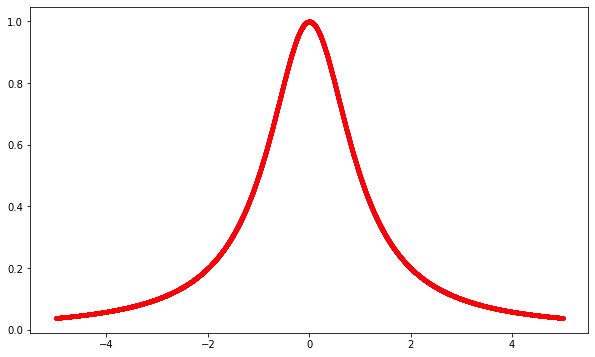

In [166]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(-5, 5, 0.002), bary_interp100, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)
plt.plot(np.arange(-5, 5, 0.002), f(list(np.arange(-5, 5, 0.002))), color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)

Sammy Suliman, last modified 10/21/2022 $\newline$
We now code the new function, and evaluate the equidistant nodes by the formula given in the assignment when n = 4,
and compute the actual values of the function at those points.

In [167]:
def f2(x2_list):
    f2_list = []
    for x in x2_list:
        f2_list.append(math.exp(-x**2 * 0.2))
    return f2_list

In [168]:
# n = 4
x2_list = x_creator(4)
print(x2_list)

[-5.0, -2.5, 0.0, 2.5, 5.0]


In [169]:
f2_list = f2(x2_list)
print(f2_list)

[0.006737946999085467, 0.2865047968601901, 1.0, 0.2865047968601901, 0.006737946999085467]


Sammy Suliman, last modified 10/21/2022 $\newline$
Next we will use our (modified) barycentric interpolation code to compute 5000 approximations for values of x not equal
to our nodes (where the nodes are once again evenly distributed). Then we plot these values alongside the actual function graph.

In [170]:
bary_interp4 = []
for x in np.arange(-5, 5, 0.002):
    if math.isnan(barycentric_interpolation2(x, x2_list, f2_list)) == False:
        bary_interp4.append(barycentric_interpolation2(x, x2_list, f2_list))
    else:
        bary_interp4.append(0)

C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1499570813.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  p1.append(f_j * (lambda_j / (x - x_j)))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1499570813.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  p2.append(lambda_j / (x - x_j))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1499570813.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return (sum(p1) / sum(p2))


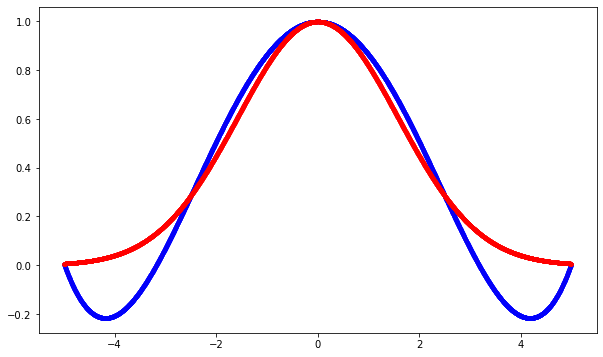

In [171]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(-5, 5, 0.002), bary_interp4, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)
plt.plot(np.arange(-5, 5, 0.002), f2(list(np.arange(-5, 5, 0.002))), color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)

Sammy Suliman, last modified 10/21/2022 $\newline$
We now evaluate the equidistant nodes by the formula given in the assignment when n = 8, and compute the actual values of the function at those points.

In [174]:
# n = 8
x2_list2 = x_creator(8)
print(x2_list2)

[-5.0, -3.75, -2.5, -1.25, 0.0, 1.25, 2.5, 3.75, 5.0]


In [175]:
f2_list2 = f2(x2_list2)
print(f2_list2)

[0.006737946999085467, 0.060054667895307945, 0.2865047968601901, 0.7316156289466418, 1.0, 0.7316156289466418, 0.2865047968601901, 0.060054667895307945, 0.006737946999085467]


Sammy Suliman, last modified 10/21/2022 $\newline$
Next we will use our (modified) barycentric interpolation code to compute 5000 approximations for values of x not equal
to our nodes (where the nodes are once again evenly distributed). Then we plot these values alongside the actual function graph.

In [176]:
bary_interp8 = []
for x in np.arange(-5, 5, 0.002):
    if math.isnan(barycentric_interpolation2(x, x2_list2, f2_list2)) == False:
        bary_interp8.append(barycentric_interpolation2(x, x2_list2, f2_list2))
    else:
        bary_interp8.append(0)

C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1499570813.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  p1.append(f_j * (lambda_j / (x - x_j)))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1499570813.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  p2.append(lambda_j / (x - x_j))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1499570813.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return (sum(p1) / sum(p2))


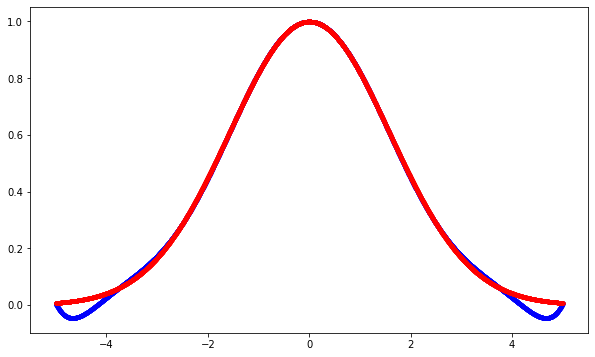

In [177]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(-5, 5, 0.002), bary_interp8, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)
plt.plot(np.arange(-5, 5, 0.002), f2(list(np.arange(-5, 5, 0.002))), color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)

Sammy Suliman, last modified 10/21/2022 $\newline$
We now evaluate the equidistant nodes by the formula given in the assignment when n = 12, and compute the actual values of the function at those points.

In [178]:
x2_list3 = x_creator(12)
print(x2_list3)

[-5.0, -4.166666666666667, -3.333333333333333, -2.5, -1.6666666666666665, -0.833333333333333, 0.0, 0.8333333333333339, 1.666666666666667, 2.5, 3.333333333333334, 4.166666666666668, 5.0]


In [179]:
f2_list3 = f2(x2_list3)
print(f2_list3)

[0.006737946999085467, 0.03104795847932961, 0.10836802322189591, 0.2865047968601901, 0.5737534207374329, 0.8703247258333906, 1.0, 0.8703247258333904, 0.5737534207374327, 0.2865047968601901, 0.10836802322189582, 0.03104795847932957, 0.006737946999085467]


Sammy Suliman, last modified 10/21/2022 $\newline$
Next we will use our (modified) barycentric interpolation code to compute 5000 approximations for values of x not equal
to our nodes (where the nodes are once again evenly distributed). Then we plot these values alongside the actual function graph.

In [180]:
bary_interp12 = []
for x in np.arange(-5, 5, 0.002):
    if math.isnan(barycentric_interpolation2(x, x2_list3, f2_list3)) == False:
        bary_interp12.append(barycentric_interpolation2(x, x2_list3, f2_list3))
    else:
        bary_interp12.append(0)

C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1499570813.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  p1.append(f_j * (lambda_j / (x - x_j)))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1499570813.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  p2.append(lambda_j / (x - x_j))
C:\Users\filto\AppData\Local\Temp/ipykernel_15128/1499570813.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return (sum(p1) / sum(p2))


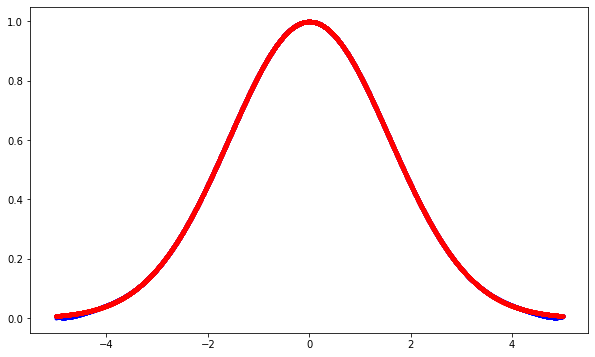

In [181]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(-5, 5, 0.002), bary_interp12, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)
plt.plot(np.arange(-5, 5, 0.002), f2(list(np.arange(-5, 5, 0.002))), color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=3)

CONCLUSIONS: $\newline$
In part (a), the polynomial interpolation does not produce a very good approximation for the function f when using 
evenly distributed nodes to evaluate. The convergence improved in part (b), when a formula for non-evenly distributed
nodes was used instead, as the number of interpolating points used  increased to n = 100, corresponding to the approximation converging to the function. The interpolation's accuracy significantly improved in part (c), where the same formula for computing evenly distributed nodes as in part (a) was used, but to approximate a different function. This seems to indicate that using evenly distributed nodes only produces a convergent polynomial interpolation on certain functions but not others.